In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
from numpy import loadtxt
from scipy.interpolate import make_interp_spline
import array
import random
import math

V_pos = []
y_exp = []
y_exp2 = []
cos = []
gamma = 1
V_ln = np.array([])
c1 = 66.5
c3 = 78

In [ ]:
t = loadtxt("Tempi.dat", comments="#", delimiter=",", unpack=False)
print(t)

V = loadtxt("Volt.dat", comments="#", delimiter=",", unpack=False)
print(V)

In [ ]:
plt.figure("t - V")
plt.grid(True,alpha=0.8)

xnew = np.linspace(t.min(), t.max(), 300) 

spl = make_interp_spline(t, V, k=2) 
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)

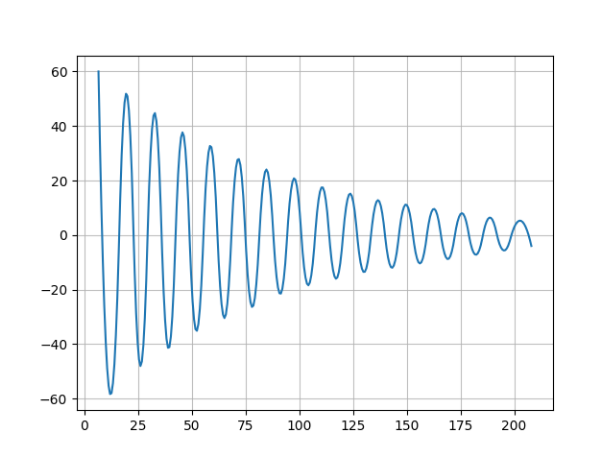

In [ ]:
for i in range(len(V)):
    if (V[i] < 0):
      V_pos.append(-1 * V[i])
    else:
      V_pos.append(V[i])

plt.grid(True,alpha=0.8)
#plt.plot(t,V_pos)
for i in range(len(V_pos)):
  V_ln = np.append(V_ln,math.log(V_pos[i]))
print(V_ln)
for j in range(len(t)):
   y_exp.append(c1*math.exp(-t[j]/c3))
#plt.plot(t,y_exp)

plt.figure("t - ln(|V|)")
log_V = loadtxt("log_volt.dat", comments="#", delimiter=",", unpack=False)
plt.grid(True)
plt.plot(t,V_ln)

X = t
Y2 = V_ln
sum_x = np.sum(X)
sum_y = np.sum(Y2)
sum_xy = np.sum(X*Y2)
sum_xq = np.sum(X**2)
sum_yq = np.sum(Y2**2)
c2 = ((sum_xq * sum_y) - (sum_x * sum_xy)) / ((len(X)*(sum_xq))-((sum_x)**2))
m2 = ((len(X)*sum_xy)-(sum_x * sum_y)) / ((len(X)*(sum_xq))-((sum_x)**2))
print(f"Coefficiente angolare (m): {m2}")
print(f"Intercetta (c): {c2}")

y_pr2 = m2 * X + c2
plt.plot(X, y_pr2, color='red', label='Retta stimata')
plt.legend()

plt.figure("t - |V|")
for i in range(len(t)):
    y_exp2.append(math.exp(c2)*math.exp(-t[i]*(-m2)))
print(y_exp2)
plt.grid(True)
plt.plot(t,y_exp2)
plt.plot(t,V_pos)

plt.figure()
plt.grid(True)
for i in range(len(t)):
   cos.append(-1*(V[0])*(math.cos(t[i]*((2*math.pi)/(t[2]-t[0])))))

xnew1 = np.linspace(t.min(), t.max(), 300) 

spl1 = make_interp_spline(t, cos, k=2) 
power_smooth1 = spl1(xnew1)

plt.plot(xnew1, power_smooth1)

xnew = np.linspace(t.min(), t.max(), 300) 

spl = make_interp_spline(t, V, k=2) 
power_smooth = spl(xnew)

plt.plot(xnew, power_smooth)

xnew3 = np.linspace(t.min(), t.max(), 300) 

spl3 = make_interp_spline(t, y_exp2, k=2) 
power_smooth3 = spl3(xnew3)

plt.plot(xnew3, power_smooth3)

print("Il valore di w: ",math.sqrt((((2*math.pi)/(t[2]-t[0]))**2)-((-m2)**2)))

plt.show()

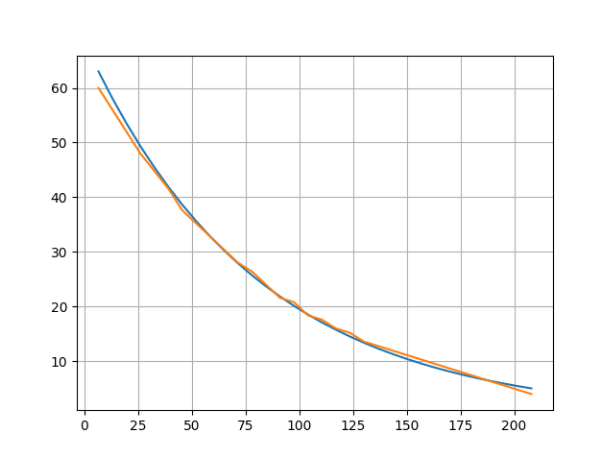


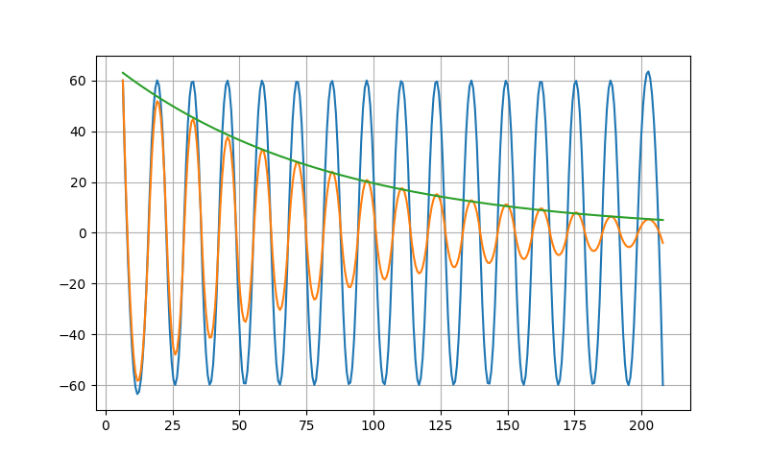
